# Model 1: K-Means Clustering
- Use `Elbow Method` & `WCSS` (Within-Cluster Sum of Squares) to determine the optimal `k`.
- Plot the `WCSS` vs `k` graph, visualize and determine the optimal value of `k`.
- Apply K-Means with the optimal `k`.
<li> Print the 1st few documents per cluster: first 5 documents in each cluster, first 200 characters in each document. </li>

In [1]:
# Import
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Obtain dataset
newsgroups = fetch_20newsgroups(subset='all')
data = newsgroups.data
labels = newsgroups.target

## Preprocess dataset
1. Create a TfidVectorizer object.
    - This object is used to convert the raw text data into a numerical representation called TF-IDF.
    - `TF-IDF`: Term Frequency-Inverse Document Frequency
    - `stop_words='english'`: Ignore common English words like `the`, `a` and `is`, they typically don't carry much meaningful information.
1. Fit & Transform:
    - `fit`: The vectorizer learns the vocabulary and IDF weights from the data.
    - `transform`: It transforms the data into a matrix where each row represents a document and each column represents a word in the vocabulary. The values in the matrix are the TF-IDF scores, indicating the importance of each word in each document.

In [3]:
# Preprocess dataset
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

## Find the optimal value of `k`
- WCSS (Within-Cluster Sum of Squares)
Steps:
    1. We run the function from `1-10`, which determines the optimal value of k within this range.
    1. We plot the WCSS vs k graph to determine the optimal value. **The optimal value is the one where WCSS stops decreasing drastically and stabilizes.**

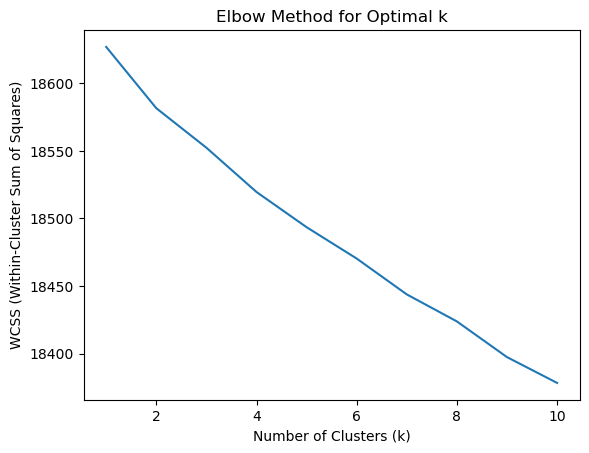

In [4]:
# Find the optimal value of `k`

wcss = [] #
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [5]:
## Perform K-Means clustering using the optimal value
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [6]:
# Output: Print the first few documents: 5 docs of each cluster, first 200 characters of each document
for i in range(optimal_k):
    print(f"Cluster {i}:")
    cluster_docs = [data[j] for j in range(len(data)) if y_kmeans[j] == i]
    for doc in cluster_docs[:5]:
        print(doc[:200])
    print("-" * 50)

Cluster 0:
From: tell@cs.unc.edu (Stephen Tell)
Subject: Re: subliminal message flashing on TV
Organization: The University of North Carolina at Chapel Hill
Lines: 25
NNTP-Posting-Host: rukbat.cs.unc.edu

In art
From: lpa8921@tamuts.tamu.edu (Louis Paul Adams)
Subject: Re: Number for Applied Engineering
Organization: Texas A&M University, College Station
Lines: 9
NNTP-Posting-Host: tamuts.tamu.edu

>Anyone ha
From: filipe@vxcrna.cern.ch (VINCI)
Subject: Re: Krillean Photography
News-Software: VAX/VMS VNEWS 1.41    
Organization: European Organization for Nuclear Research, CERN
Lines: 14

In article <1993Ap
From: kmr4@po.CWRU.edu (Keith M. Ryan)
Subject: Re: Islam And Scientific Predictions (was Re: Genocide is Caused by Atheism)
Organization: Case Western Reserve University
Lines: 14
NNTP-Posting-Host: 
From: dbd@urartu.sdpa.org (David Davidian)
Subject: "Stretching from the Adriatic Sea to the Great Wall of China"
Organization: S.D.P.A. Center for Regional Studies
Lines: 22

In the fo